<a href="https://colab.research.google.com/github/acg12/Scholarship-Bootcamp/blob/main/CASE_WEEK_1/ML/Mall_customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Cleaning & Visual EDA

In [76]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.isnull().any()

CustomerID                False
Genre                     False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [6]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [ ]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


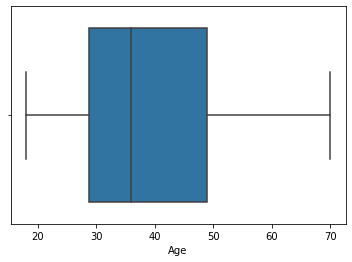

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


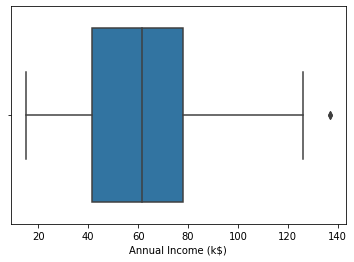

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


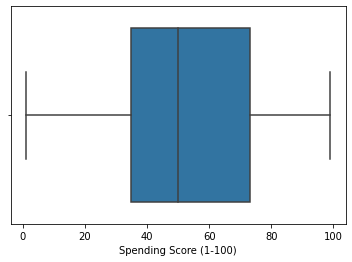

In [ ]:
sns.boxplot(
    df['Age']
)
plt.show()
sns.boxplot(
    df['Annual Income (k$)']
)
plt.show()
sns.boxplot(
    df['Spending Score (1-100)']
)
plt.show()

Dari scatter plot di bawah ini, kita bisa melihat bahwa semakin kecil Age nya customer, spending score nya semakin kecil, tidak ada yang memiliki spending score di atas 60, untuk customer berumur 40 - 70.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


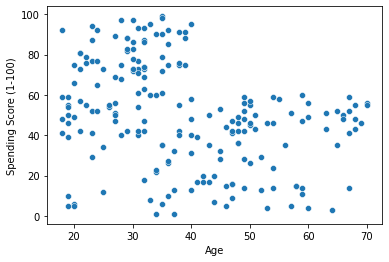

In [ ]:
sns.scatterplot(
    df['Age'],
    df['Spending Score (1-100)']
)
plt.show()

Dari scatter plot di bawah ini, kita bisa melihat bahwa semakin besar customer ID-nya, semakin besar pula Annual Income dari customer tersebut.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


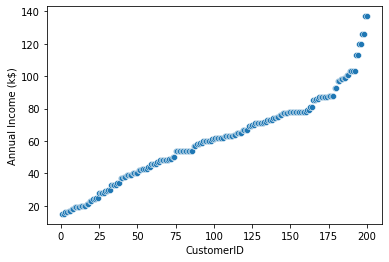

In [ ]:
sns.scatterplot(
    df['CustomerID'],
    df['Annual Income (k$)']
)

Dari berbagai plot dibawah ini, bisa melihat:
- Lebih banyak jumlah "Female" yang melakukan aktivitas belanja di mall tersebut, sehingga CustomerID lebih banyak terdiri dari "Female"
- Di umur 20 - 60 an ada lebih banyak "Female" yang belanja di mall
- Annual Income untuk "Female" juga rata-rata lebih besar daripada "Male"
- Spending Score untuk "Female" juga rata-rata lebih besar daripada "Male" 

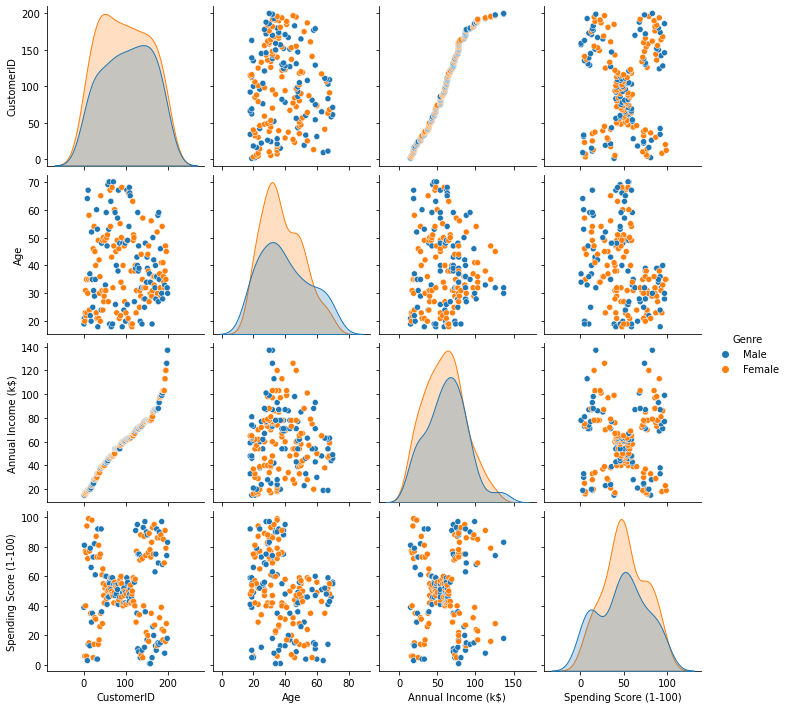

In [ ]:
sns.pairplot(data=df, hue='Genre')

# 2. Training Set & Test Set

In [23]:
X = df.drop(['Spending Score (1-100)'], axis=1)
y = df['Spending Score (1-100)']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train)
print(y_train)

     CustomerID   Genre  Age  Annual Income (k$)
114         115  Female   18                  65
173         174    Male   36                  87
5             6  Female   22                  17
126         127    Male   43                  71
117         118  Female   49                  65
..          ...     ...  ...                 ...
106         107  Female   66                  63
14           15    Male   37                  20
92           93    Male   48                  60
179         180    Male   35                  93
102         103    Male   67                  62

[150 rows x 4 columns]
114    48
173    92
5      76
126    35
117    59
       ..
106    50
14     13
92     49
179    90
102    59
Name: Spending Score (1-100), Length: 150, dtype: int64


In [24]:
from sklearn.preprocessing import OneHotEncoder

oh_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

genre_train = pd.DataFrame(oh_encoder.fit_transform(X_train[['Genre']]))
genre_test = pd.DataFrame(oh_encoder.transform(X_test[['Genre']]))

genre_train.index = X_train['Genre'].index
genre_test.index = X_test['Genre'].index

dropped_train = X_train.drop(['Genre'], axis=1)
dropped_test = X_test.drop(['Genre'], axis=1)

new_X_train = pd.concat([dropped_train, genre_train], axis=1)
new_X_test = pd.concat([dropped_test, genre_test], axis=1)

new_X_train

,CustomerID,Age,Annual Income (k$),0,1
114,115,18,65,1.0,0.0
173,174,36,87,0.0,1.0
5,6,22,17,1.0,0.0
126,127,43,71,0.0,1.0
117,118,49,65,1.0,0.0
...,...,...,...,...,...
106,107,66,63,1.0,0.0
14,15,37,20,0.0,1.0
92,93,48,60,0.0,1.0
179,180,35,93,0.0,1.0


# 3. Pemodelan

In [66]:
model = LinearRegression()
model.fit(new_X_train, y_train)
predictions = model.predict(new_X_test)

In [67]:
print(y_test.head())
print(pd.DataFrame(predictions).head())

95     52
15     79
30      4
158     1
128    11
Name: Spending Score (1-100), dtype: int64
           0
0  58.301560
1  58.901192
2  37.677939
3  57.745566
4  41.445487


# 4. Evaluasi Model

In [80]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
print('MAE:', mean_absolute_error(y_test, predictions))
print('Cross Validation: ', cross_val_score(model, new_X_test, y_test, cv=5, scoring='neg_mean_absolute_error') * -1)

RMSE: 23.160026223722017
MAE: 19.18093841773598
Cross Validation:  [20.3372511  15.11947657 25.74121757 14.09983542 24.45610545]


In [71]:
print(model.coef_)

[ 0.17111196 -0.53914094 -0.33025767  0.19427489 -0.19427489]


# 5. Plot Predicted Value vs Measure

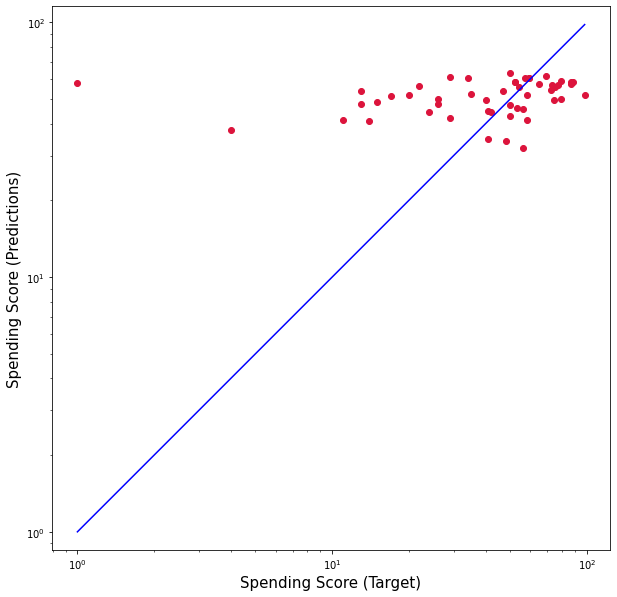

In [72]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, predictions, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predictions), max(y_test))
p2 = min(min(predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Spending Score (Target)', fontsize=15)
plt.ylabel('Spending Score (Predictions)', fontsize=15)
plt.axis('equal')
plt.show()